In [1]:
import ogr

In [47]:
import matplotlib.pyplot as plt
import random
def randomCol():
    ls = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    return "#{0}".format("".join(random.sample(ls,6)))
def show(polyArr, xm=(100,130),ym=(25,45)):  
    fig = plt.figure(figsize=(12,9)) 
    ax = fig.gca() 
    ax.grid(alpha= 1)
    for i in range(len(polyArr)):
        p = polyArr[i].split("((")[1].split("))")[0].split(",")
        pl = []
        for coord in p:
            pnt = coord.split(" ")
            pl.append([float(pnt[0]),float(pnt[1])])
        if i >= 2:
            mpoly = plt.Polygon(pl,ec = '#000000',fc=randomCol(), alpha = 0.5,hatch='/')
        else:
            mpoly = plt.Polygon(pl,ec = '#000000',fc=randomCol(), alpha = 0.5)
        ax.add_patch(mpoly)
    ax.set_autoscale_on= False
    ax.set_xlim(xm[0],xm[1])
    ax.set_ylim(ym[0],ym[1])

In [48]:
poly1 = 'POLYGON((116 39,116 32,105 37,111 42,116 39))'
poly2 = 'POLYGON((114 41,121 36,119 29,109 29,114 41))'

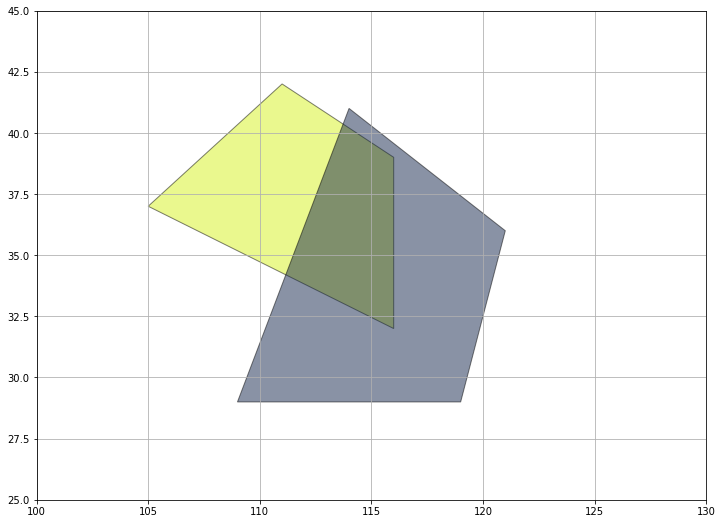

In [49]:
show([poly1,poly2])

In [50]:
geom1 = ogr.CreateGeometryFromWkt(poly1)
geom2 = ogr.CreateGeometryFromWkt(poly2)

### 计算是否相交

In [51]:
geom1.Intersect(geom2)

True

### 获取相交的区域

In [52]:
geom3 = geom1.Intersection(geom2)
print(geom3)

POLYGON ((116 39,116 32,111.165605095541 34.1974522292994,113.733333333333 40.36,116 39))


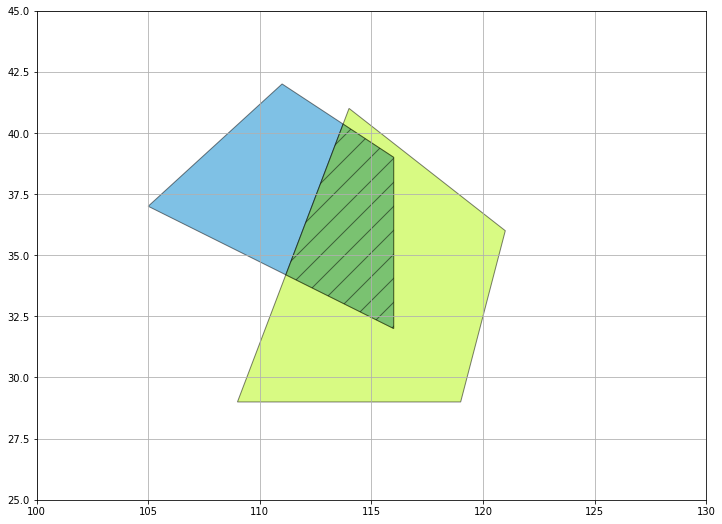

In [56]:
show([poly1,poly2,geom3.ExportToIsoWkt()])

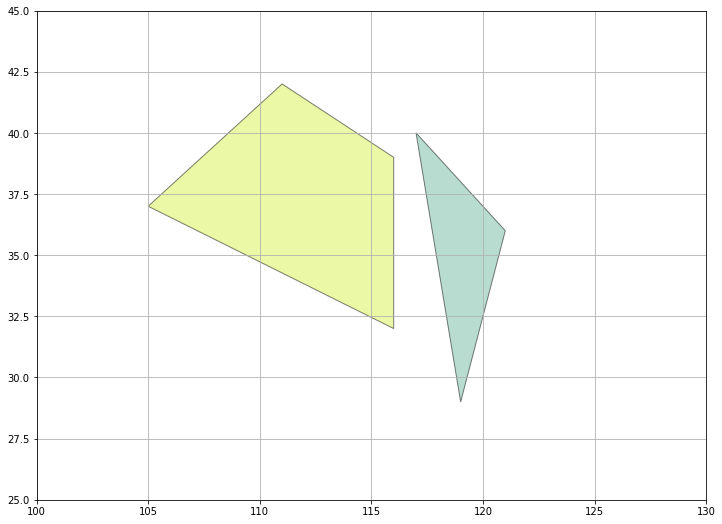

In [61]:
poly1 = 'POLYGON((116 39,116 32,105 37,111 42,116 39))'
poly2 = 'POLYGON((117 40,121 36,119 29,119 29,117 40))'
show([poly1,poly2])

In [63]:
geom1 = ogr.CreateGeometryFromWkt(poly1)
geom2 = ogr.CreateGeometryFromWkt(poly2)
print("是否相交:{0}".format(geom1.Intersect(geom2)))
print("是否分离:{0}".format(geom1.Disjoint(geom2)))

是否相交:False
是否分离:True
